Imports

In [1]:
import pandas as pd
import numpy as np

# Part 1

In [2]:
# from jupiter import ...

# Part 2 : Linear regression

Importing database

In [3]:
database_service = "sqlite"
database = "jupiter.db"

In [4]:
connectable = f"{database_service}:///{database}"
print(f"Our connectable for our database is {connectable}")

Our connectable for our database is sqlite:///jupiter.db


In [5]:
moons = pd.read_sql_table('moons', 'sqlite:///jupiter.db')

Accessing the fields to be analysed

In [6]:
major_axis = moons['distance_km']
orbital_period = moons['period_days']

Kepler's Third Law
<img src="kepler3law.png" alt="Kepler's 3rd Law" style="display:block;margin-left:auto;margin-right:auto;width:50%"/>


In [54]:
a = major_axis*1000         # convert from km to m
T = orbital_period*86400    # convert from days to seconds
G = 6.67*(10**-11)          # Gravitational constant, m^3 kg^-1 s^-2

# proportional variables in Kepler's 3rd law
a_3 = a**3
T_2 = T**2

The correlation coefficient of the orbital period to the semi-major axis is 0.992.


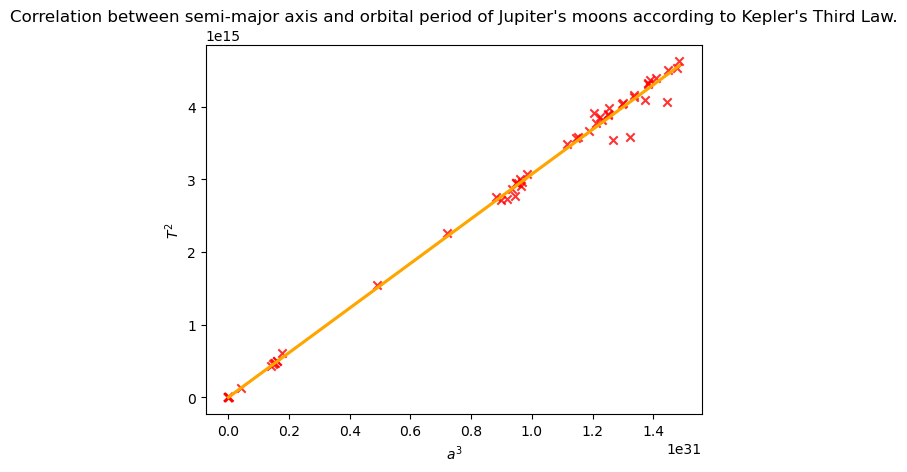

In [55]:
import seaborn as sns

plot = sns.regplot(x=a_3, y=T_2,marker = "x", color = "red", ci=False, line_kws={'color':'orange'})

# title and labels
plot.set_title("Correlation between semi-major axis and orbital period of Jupiter's moons according to Kepler's Third Law.")
plot.set_xlabel("$a^3$")
plot.set_ylabel("$T^2$")

print(f"The correlation coefficient of the orbital period to the semi-major axis is {moons['period_days'].corr(moons['distance_km']):.3f}.")

Linear regression to predict the mass of Jupiter

In [81]:
from sklearn.model_selection import train_test_split

y_train, y_test = train_test_split(T_2, test_size=0.3, random_state = 42) # y=T
x_train, x_test = train_test_split(a_3, test_size=0.3, random_state = 42) # x=a

dist_train_df = pd.DataFrame(x_train)
dist_test_df = pd.DataFrame(x_test)

from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(dist_train_df, y_train)

distance_pred = model.predict(dist_test_df)

from sklearn.metrics import r2_score, mean_squared_error

print(f"The r^2 score is {r2_score(y_test, distance_pred):.3f}.")
print(f"The root mean squared error is {mean_squared_error(y_test, distance_pred, squared = False):.15g}.")

The r^2 score is 0.987.
The root mean squared error is 198563640235261.


In [82]:
M = 4 * (np.pi**2) * (1/model.coef_[0])* 1/G

print(f"The calculated mass of Jupiter is {M :.4g} kg.")

The calculated mass of Jupiter is 1.905e+27 kg.


The official mass of Jupiter is 1.898 x $10^{27}$ kg.

In [84]:
m_real = 1.898*(10**27)
print(f"The percentage error of the calculated mass of Jupiter is {((M-m_real)/m_real)*1000 :.2f}%.")

The percentage error of the calculated mass of Jupiter is 3.43%.
